## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Increase cutoff point to 600
application_types_to_replace = [v for v, i in application_df['APPLICATION_TYPE'].value_counts().items() if i < 600]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[application_df['CLASSIFICATION'].value_counts() > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Change cutoff point to 1000
classifications_to_replace = [v for v, i in application_df['CLASSIFICATION'].value_counts().items() if i < 1000]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df[["APPLICATION_TYPE",'AFFILIATION',"CLASSIFICATION", 'USE_CASE', 'ORGANIZATION', \
                         'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']])


dummies.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [15]:
data = application_df.drop(columns=['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', \
                         'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
data = data.join(dummies)

In [16]:
data.IS_SUCCESSFUL.value_counts()

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays
X = data.drop(columns="IS_SUCCESSFUL").values
y = data.IS_SUCCESSFUL.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

## Attempt 1 - 73% Accuracy

#### Changes made:
- Increased cutoff values for APPLICATION_TYPE and CLASSIFICATION columns
- Test size and shuffle was modified to the train_test_split function
- Added a third hidden layer
- Changed the number of neurons at each layer
- Changed activation functions for the second and third layers to sigmoid

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = X_train.shape[1]
hidden_layer_1 = 100
hidden_layer_2 = 30
hidden_layer_3 = 10
out_put_neuron = 1

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(layers.Dense(units=hidden_layer_1, input_dim = input_dim, activation = "relu"))

# Second hidden layer
nn_opt1.add(layers.Dense(units=hidden_layer_2, activation = "sigmoid"))

nn_opt1.add(layers.Dense(units=hidden_layer_3, activation = "sigmoid"))

# Output layer
nn_opt1.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn_opt1.summary()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,551 (29.50 KB)

 Trainable params: 7,551 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
nn_opt1.compile(optimizer='adam', loss ="binary_crossentropy", metrics=["accuracy"])

In [23]:
# Train the model
history1 = nn_opt1.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.6755 - loss: 0.6148 - val_accuracy: 0.7236 - val_loss: 0.5709
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.7358 - loss: 0.5562 - val_accuracy: 0.7269 - val_loss: 0.5655
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.7358 - loss: 0.5519 - val_accuracy: 0.7234 - val_loss: 0.5637
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7261 - loss: 0.5578 - val_accuracy: 0.7214 - val_loss: 0.5646
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.7298 - loss: 0.5553 - val_accuracy: 0.7243 - val_loss: 0.5614
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.7342 - loss: 0.5481 - val_accuracy: 0.7187 - val_loss: 0.5636
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7359 - loss: 0.5453 - val_accuracy: 0.7198 - val_loss: 0.5621
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7334 - loss: 0

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 214us/step - accuracy: 0.7319 - loss: 0.5545
Loss: 0.5545322895050049, Accuracy: 0.7319241762161255


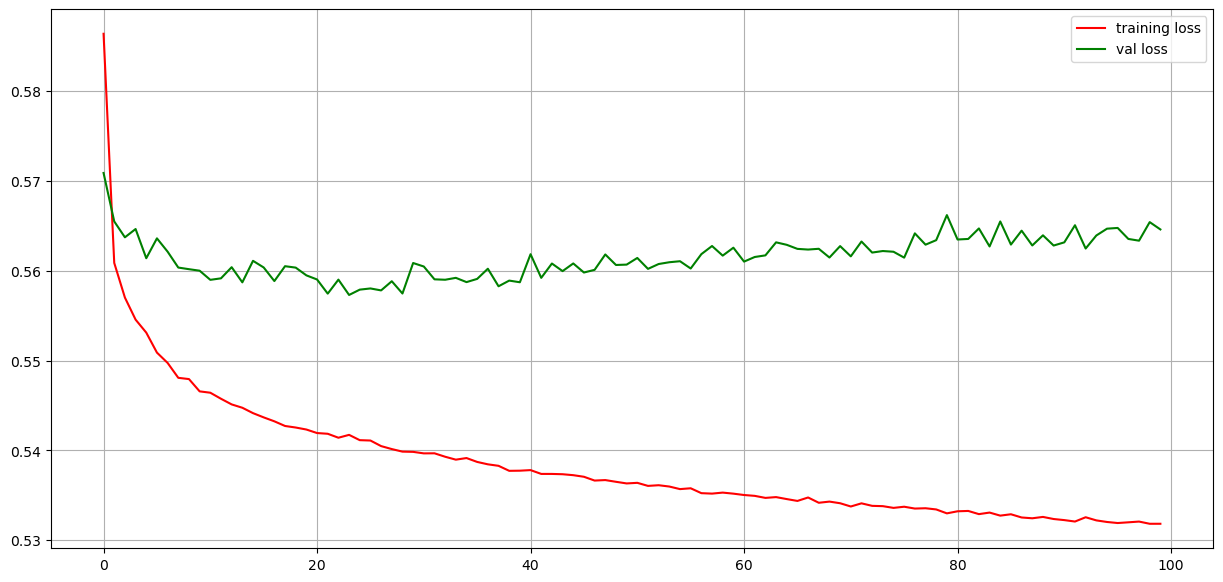

In [26]:
import matplotlib.pyplot as plt

# Plot the training and val_loss
epochs = 100
x_axis = [i for i in range(epochs)]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
plt.figure(figsize=(15,7))
plt.plot(x_axis, loss, color="red", label = "training loss")
plt.plot(x_axis, val_loss, color="green", label="val loss")
plt.grid()
plt.legend()
plt.show()

In [27]:
# Export our model to HDF5 file
nn_opt1.save("AlphabetSoupCharity_Optimization_1.h5")

## Attempt 2

#### Changes made:
- Removed the ASK_AMT column
- Removed the SPECIAL_CONSIDERATIONS Y and N columns
- Changed parameters in the train_test_split function
- Modified the neurons in the hidden layers, removed the third hidden layer
- Added a batch size to the model

In [34]:
# Remove the 'ASK_AMT' column
data = data.drop(columns = ['ASK_AMT', 'SPECIAL_CONSIDERATIONS_Y', 'SPECIAL_CONSIDERATIONS_N'])
data

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,1,False,False,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
4,1,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34295,0,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
34296,0,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
34297,1,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [35]:
# Split our preprocessed data into our features and target arrays
X = data.drop(columns="IS_SUCCESSFUL").values
y = data.IS_SUCCESSFUL.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = X_train.shape[1]
hidden_layer_1 = 38
hidden_layer_2 = 76

nn_opt_2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt_2.add(layers.Dense(units=hidden_layer_1, input_dim = input_dim, activation = "relu"))

# Second hidden layer
nn_opt_2.add(layers.Dense(units=hidden_layer_2, activation = "sigmoid"))

# Output layer
nn_opt_2.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn_opt_2.summary()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 38)             │         1,482 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 76)             │         2,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,523 (17.67 KB)

 Trainable params: 4,523 (17.67 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model
nn_opt_2.compile(optimizer='adam', loss ="binary_crossentropy", metrics=["accuracy"])

In [41]:
# Train the model
history2 = nn_opt_2.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=10)

Epoch 1/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.6967 - loss: 0.5942 - val_accuracy: 0.7172 - val_loss: 0.5680
Epoch 2/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7305 - loss: 0.5564 - val_accuracy: 0.7222 - val_loss: 0.5612
Epoch 3/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7283 - loss: 0.5599 - val_accuracy: 0.7191 - val_loss: 0.5592
Epoch 4/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7317 - loss: 0.5562 - val_accuracy: 0.7207 - val_loss: 0.5595
Epoch 5/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7302 - loss: 0.5554 - val_accuracy: 0.7205 - val_loss: 0.5704
Epoch 6/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7343 - loss: 0.5513 - val_accuracy: 0.7199 - val_loss: 0.5619
Epoch 7/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7292 - loss: 0.5479 - val_accuracy: 0.7207 - val_loss: 0.5610
Epoch 8/100
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - 170us/step - accuracy: 0.7257 - loss: 0.5730
Loss: 0.5729814171791077, Accuracy: 0.7256559729576111


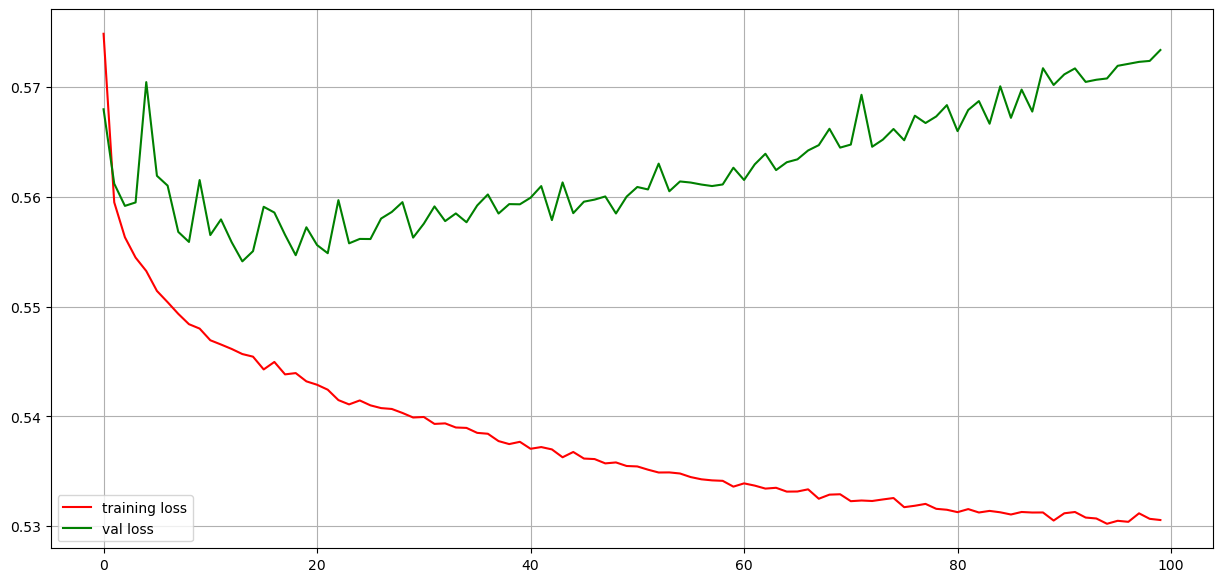

In [43]:
# Plot the training and val_loss
epochs = 100
x_axis = [i for i in range(epochs)]
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
plt.figure(figsize=(15,7))
plt.plot(x_axis, loss, color="red", label = "training loss")
plt.plot(x_axis, val_loss, color="green", label="val loss")
plt.grid()
plt.legend()
plt.show()

In [44]:
nn_opt_2.save('AlphabetSoupCharity_Optimization_2.h5')
